# 소상공인시장진흥공단_상가업소정보_201806

* https://www.data.go.kr/dataset/15012005/fileData.do

In [1]:
%ls data/shop_201806/

shop_201806_01.csv* shop_201806_02.csv* shop_201806_03.csv* shop_201806_04.csv*


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from plotnine import *
import folium

In [4]:
shop_2018 = pd.read_csv('data/shop_201806/shop_201806_01.csv', encoding='cp949')
shop_2018.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [5]:
coffee = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

(18759, 39)

In [6]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
# 상호명으로 봤을 때 커피점이 12472개가 있다.
coffee['상호명'].unique().shape

(13472,)

In [8]:
coffee['시도명'].isnull().sum()

0

In [9]:
# 지난 데이터와 마찬가지로 서울과 부산만 있습니다.
# 다른 지역을 참고하고 싶다면 같은 폴더에 있는 다른 파일을 참고해 주세요.
coffee['시도명'].unique()

array(['부산광역시', '서울특별시'], dtype=object)

In [10]:
coffee['시군구명'].unique()

array(['연제구', '강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '종로구', '도봉구',
       '마포구', '광진구', '기장군', '남구', '서대문구', '은평구', '양천구', '해운대구', '관악구',
       '성동구', '송파구', '금천구', '사상구', '동대문구', '강서구', '금정구', '동작구', '중랑구',
       '강동구', '사하구', '북구', '용산구', '노원구', '부산진구', '강북구', '수영구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [11]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    18759
Name: 상권업종중분류명, dtype: int64

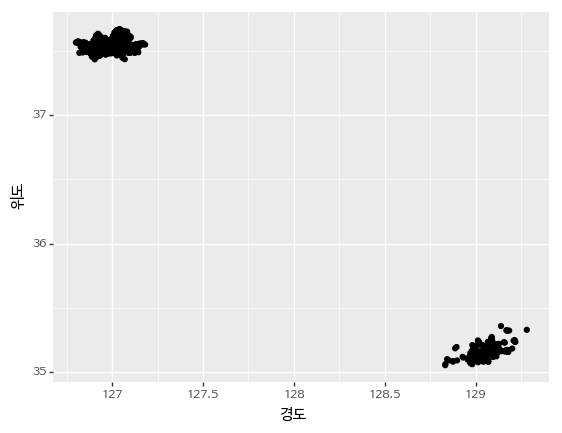

<ggplot: (291301654)>

In [12]:
(ggplot(shop_2018[:1000])
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [13]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(330089, 39)

In [14]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          285856
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19088
표준산업분류명       19088
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         62453
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        289290
건물관리번호            0
건물명          176500
도로명주소             0
구우편번호             0
신우편번호             2
동정보          305116
층정보           97585
호정보          283475
경도                0
위도                0
dtype: int64

In [15]:
df_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

In [16]:
df_seoul.describe(include=np.object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,330089,44233,330089,330089,330089,330089,330089,330089,311001,311001,...,330089,330089,330089,330089,330089,153589,330089,24973,232504,46614
unique,233567,15087,9,9,94,94,686,686,210,210,...,465,2,124181,11861,124735,25179,123973,914,115,2494
top,CU,본점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,신림동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,1111016400102700003012054,동대문종합시장,서울특별시 종로구 종로 266,1,1,1
freq,1450,294,109766,109766,35778,35778,23721,23721,43878,43878,...,6759,329735,976,2352,1008,1011,995,4307,161124,5469


In [17]:
df_seoul[['위도', '경도']].describe(include=np.number)

,위도,경도
count,330089.000000,330089.000000
mean,37.545992,126.994943
std,0.049406,0.081294
min,37.434081,126.768169
25%,37.505306,126.925013
50%,37.543243,127.009046
75%,37.574720,127.055651
max,37.692398,127.182588


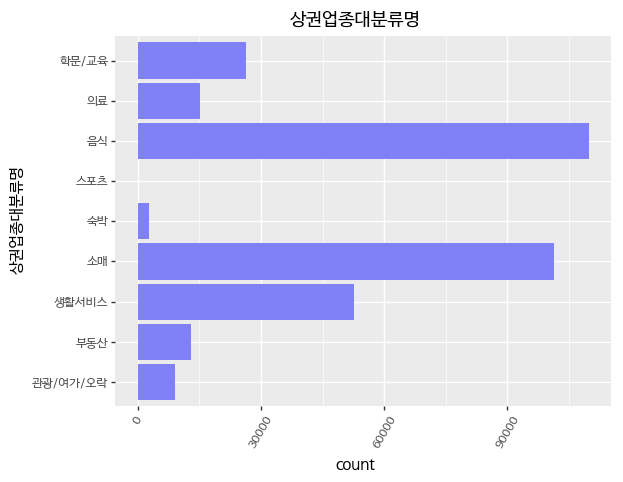

<ggplot: (-9223372036562852299)>

In [18]:
(ggplot(df_seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종대분류명')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [19]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(109766, 39)

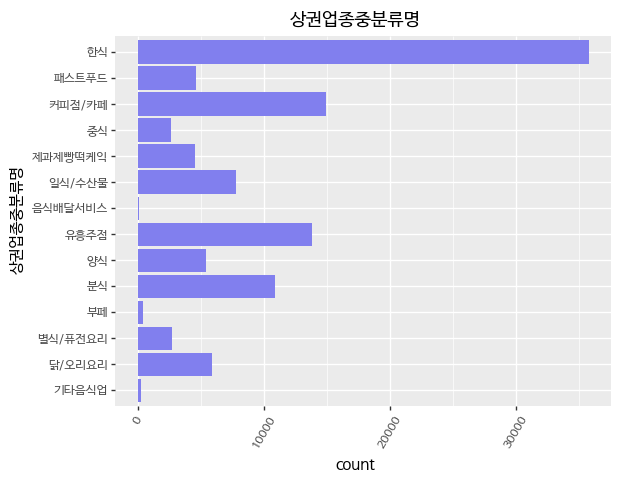

<ggplot: (-9223372036562827397)>

In [20]:
(ggplot(df_food)
 + aes('상권업종중분류명')
 + geom_bar(fill='#817FEE')
 + ggtitle('상권업종중분류명')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [21]:
df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

(4605, 39)

In [22]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [23]:
df_fast_food['상호명'].unique()

array(['피자마루', '롯데리아', '배스킨라빈스', ..., '브리웰', '베이크럽', '델리'], dtype=object)

# 배스킨라빈스와 던킨도너츠 입지분석

In [24]:
df_31 = df_seoul.loc[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(438, 39)

In [25]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', 
               '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_31.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [26]:
df_31['상호명'].value_counts()

배스킨라빈스31                102
던킨도너츠                    86
배스킨라빈스                   44
던킨도넛                      4
배스킨라빈스31성수역점              1
배스킨라빈스노원세이브존              1
배스킨라빈스31쌍문점               1
던킨도너츠신림양지병원점              1
배스킨라빈스31대치2호점             1
배스킨라빈스31개봉푸르지오점           1
던킨도너츠당고개역사                1
배스킨라빈스31숙명여대점             1
배스킨라빈스영등포문래               1
배스킨라빈스31보문역점              1
배스킨라빈스용산후암                1
던킨도너츠공항철도서울역사             1
배스킨라빈스31공릉점               1
던킨도너츠김포국제공항점              1
배스킨라빈스31목동이마트점            1
던킨도너츠오목교점                 1
배스킨라빈스교대점                 1
배스킨라빈스31위례중앙점             1
배스킨라빈스청춘2017커피페스티벌부스      1
배스킨라빈스31구로천왕역점            1
배스킨라빈스31청량리역사점            1
배스킨라빈스31면목역점              1
배스킨라빈스31미아역점              1
던킨도너츠강남역점                 1
배스킨라빈스31구로고척점             1
국제흥업개발던킨도너츠용산센트럴점         1
                       ... 
배스킨라빈스31선유도역              1
배스킨라빈스31북가좌점              1
비알코리아던킨도너츠건대              1
배스킨라빈스31도화점               1
배스킨라빈스31상계백병원점      

In [27]:
# 브랜드명이라는 컬럼을 새로 만들어줍니다.
df_31['브랜드명'] = ''

In [28]:
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [29]:
df_31.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명,브랜드명
63,배스킨라빈스,관악구청점,음식,패스트푸드,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동,배스킨라빈스
1564,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동,던킨도너츠
1921,던킨도너츠창동하나로,NaN,음식,패스트푸드,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동,던킨도너츠
1958,던킨도너츠용산민자역사2호,NaN,음식,패스트푸드,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로21나길 7,37.527903,126.963223,용산구,한강로동,던킨도너츠
2459,던킨도너츠,잠실본동점,음식,패스트푸드,서울특별시 송파구 잠실동 242-9,서울특별시 송파구 석촌호수로 118,37.507431,127.090005,송파구,잠실본동,던킨도너츠


In [30]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    290
던킨도너츠     148
Name: 브랜드명, dtype: int64

In [31]:
df_31_ratio = df_31_group_count[0]/df_31_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 {0:.2f}배가량 많습니다.'.format(df_31_ratio))

제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 1.96배가량 많습니다.


In [32]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 63 to 476000
Data columns (total 11 columns):
상호명         438 non-null object
지점명         369 non-null object
상권업종대분류명    438 non-null object
상권업종중분류명    438 non-null object
지번주소        438 non-null object
도로명주소       438 non-null object
위도          438 non-null float64
경도          438 non-null float64
시군구명        438 non-null object
행정동명        438 non-null object
브랜드명        438 non-null object
dtypes: float64(2), object(9)
memory usage: 41.1+ KB


In [33]:
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

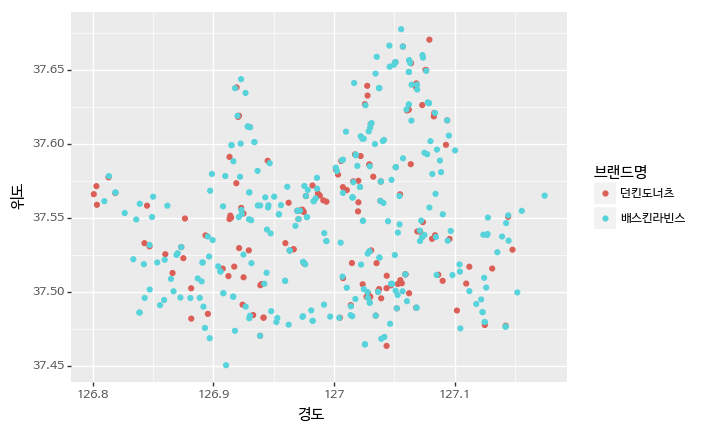

<ggplot: (-9223372036562827432)>

In [34]:
(ggplot(df_31)
 + aes(x='경도', y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

## Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [35]:
folium.Icon?

Init signature: folium.Icon(color='blue', icon_color='white', icon='info-sign', angle=0, prefix='glyphicon')
Docstring:     
Creates an Icon object that will be rendered
using Leaflet.awesome-markers.

Parameters
----------
color : str, default 'blue'
    The color of the marker. You can use:

        ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
         'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
         'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
         'gray', 'black', 'lightgray']

icon_color : str, default 'white'
    The color of the drawing on the marker. You can use colors above,
    or an html color code.
icon : str, default 'info-sign'
    The name of the marker sign.
    See Font-Awesome website to choose yours.
    the `prefix` as well.
angle : int, default 0
    The icon will be rotated by this amount of degrees.
prefix : str, default 'glyphicon'
    The prefix states the source of the icon. 'fa' for font-awesome or
    'glyphicon

In [36]:
geo_df = df_31.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'pink'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [37]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'red'
    else:
        icon_color = 'blue'    
    
    folium.features.CircleMarker(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

# 뚜레쥬르, 파리바게뜨 매장 입지 분석

In [38]:
df_bread = df_seoul.loc[
    df_seoul['상호명'].str.contains('뚜레쥬르|파리(바게|크라상)') &
    (~df_seoul['상호명'].str.contains('파스쿠찌|잠바주스'))
].copy()
# 파스쿠찌 상호명에 파리크라상이 들어가기 때문에 파스쿠찌는 제외합니다.
df_bread.shape

(628, 39)

In [39]:
df_bread['상호명'].value_counts()

파리바게뜨           199
뚜레쥬르            122
파리크라상            11
파리바게뜨카페대학로점       2
파리바게뜨월계미성         2
파리바게뜨성북점          2
씨제이뚜레쥬르           2
파리바게뜨선릉아이타워점      1
뚜레쥬르대림우성점         1
국회의사당뚜레쥬르         1
뚜레쥬르구로IT점         1
파리바게뜨상계백병원점       1
파리바게뜨상도역          1
파리바게뜨강남구청센터점      1
파리바게뜨종로구청         1
파리바게뜨마장대로점        1
파리바게뜨쌍문사거리        1
위례아이파크파리바게뜨       1
뚜레쥬르카페대치점         1
파리바게뜨뱅뱅사거리점       1
파리바게뜨금천롯데캐슬점      1
명동역남산파리바게뜨        1
파리크라상키친삼성역점       1
파리바게뜨영등포구청점       1
파리바게뜨대치하얏트점       1
파리바게뜨사당파스텔시티      1
파리바게뜨마포합정역점       1
뚜레쥬르국립중앙의료원점      1
파리바게뜨염창2호점        1
뚜레쥬르월곡래미안점        1
               ... 
파리바게뜨-판매옥수점       1
파리바게뜨신림역점         1
파리바게뜨신풍역점         1
파리바게뜨신대림자이        1
파리바게뜨역삼초교         1
파리바게뜨창동제일         1
파리바게트삼성화재         1
파리바게뜨당산포스빌        1
파리바게뜨역            1
파리바게뜨면목역점         1
은천갈입구파리바게뜨        1
파리크라상압구정역점        1
파리바게뜨온수역          1
파리바게뜨청담사거리        1
파리바게뜨카페신사점        1
파리바게뜨망원점          1
파리바게뜨보라매타운점       1
파리바게뜨일원밀알         1
파리바게뜨구로제일점        1


In [40]:
df_bread.loc[df_bread['상호명'].str.contains('파리(바게|크라상)'), '브랜드명'] = '파리바게뜨'
df_bread.loc[df_bread['상호명'].str.contains('뚜레(쥬|주)르'), '브랜드명'] = '뚜레쥬르'

In [41]:
df_bread_group_count = df_bread['브랜드명'].value_counts()
df_bread_group_count

파리바게뜨    434
뚜레쥬르     194
Name: 브랜드명, dtype: int64

In [42]:
df_bread_ratio = df_bread_group_count[0]/df_bread_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 {0:.2f}배가량 많습니다.'.format(df_31_ratio))

제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 1.96배가량 많습니다.


### 하지만, 파리바게뜨 홈페이지에서 서울시특별시의 매장정보를 보면 798개의 매장이 있습니다. 뚜레쥬르는 244개의 매장이 있습니다.
* 파리바게뜨 : https://www.paris.co.kr/store/store_list.jsp?sido=&gugun=&s_sido=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&s_gugun=&s_name=&page=98
* 뚜레쥬르 : https://www.tlj.co.kr:7008/store/search.asp?store_type=&sido=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&gugun=&keyword=

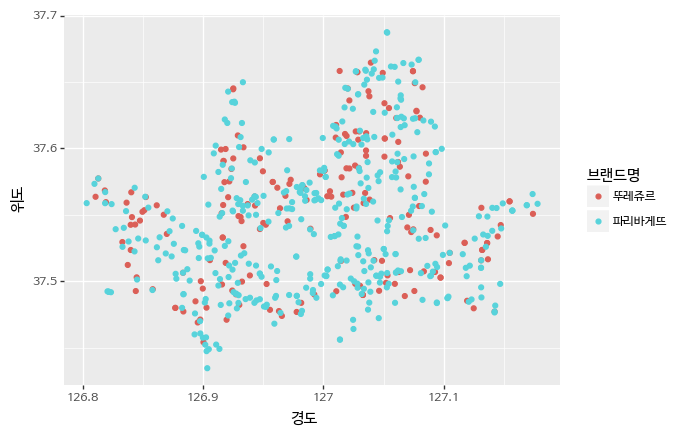

<ggplot: (298312424)>

In [43]:
(ggplot(df_bread)
 + aes(x='경도', y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [44]:
geo_df = df_bread.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '뚜레쥬르' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [45]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '뚜레쥬르' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    folium.features.CircleMarker(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map